<a href="https://colab.research.google.com/github/pablonicolasr/diplodatos-iaa-2022-grupo32/blob/Seba_IntroML/Lab_2_IntroML_Grupo_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio 2: Armado de un esquema de aprendizaje automático

**Grupo 32**

Integrantes:

* Garay, Carolina del Valle
* Ormaechea, Sebastián Gabriel
* Ramos, Pablo Nicolás


En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


%matplotlib inline

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
# Descarga de base de datos
!gdown https://drive.google.com/file/d/1JrWG6v8LOGtb983SoG5nPzx8RTxJTHOW/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1JrWG6v8LOGtb983SoG5nPzx8RTxJTHOW
To: /content/loan_data.csv
100% 138k/138k [00:00<00:00, 60.3MB/s]


In [ ]:
dataset = pd.read_csv('/content/loan_data.csv', comment="#")

In [ ]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(1483, 10)
(1483,)
(371, 10)


In [ ]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1240,9400,92340.0,125451.0,7.0,0.0,0.0,129.113725,1.0,22.0,36.349975
1183,14800,43983.0,60826.0,4.0,1.0,1.0,113.897967,1.0,9.0,27.108082
692,20100,59726.0,79982.0,8.0,1.0,0.0,74.210759,2.0,28.0,36.846922
871,25200,73168.0,93608.0,9.0,0.0,0.0,151.121480,0.0,21.0,35.590327
1353,17000,70039.0,100993.0,7.0,0.0,0.0,261.911317,1.0,11.0,36.564330
...,...,...,...,...,...,...,...,...,...,...
835,15900,48563.0,64679.0,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
1216,27500,150666.0,192346.0,3.0,0.0,0.0,177.871473,0.0,17.0,39.978650
1653,12800,54151.0,83828.0,13.0,0.0,0.0,132.160270,0.0,16.0,23.477426
559,21300,63263.0,94180.0,1.0,0.0,0.0,138.348455,1.0,22.0,35.549295


In [ ]:
y_train

1240    0
1183    0
692     0
871     0
1353    0
       ..
835     0
1216    0
1653    1
559     0
684     0
Name: TARGET, Length: 1483, dtype: int64

In [ ]:
X_test

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
724,4200,50216.0,58541.0,19.0,0.0,0.0,209.871302,0.0,19.0,20.208033
652,19300,50554.0,76140.0,9.0,2.0,0.0,78.276625,3.0,27.0,36.026904
825,13000,78766.0,106450.0,6.0,0.0,0.0,107.951312,0.0,26.0,24.870994
1636,11800,67678.0,108092.0,13.0,0.0,7.0,126.658232,0.0,36.0,37.162690
18,87500,55938.0,86794.0,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653
...,...,...,...,...,...,...,...,...,...,...
485,79100,23553.0,103807.0,25.0,0.0,1.0,142.193458,0.0,13.0,31.469937
1702,16300,79087.0,102921.0,23.0,0.0,0.0,256.253084,0.0,45.0,36.987086
511,26900,72848.0,101736.0,10.0,0.0,0.0,131.409634,0.0,21.0,36.369027
1406,13000,80587.0,110064.0,6.0,0.0,0.0,85.009197,1.0,13.0,33.990040



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1 - El conjunto de datos contiene información de línea de base y rendimiento de préstamos de un banco, para 5960 solicitantes. El departamento de crédito al consumo, pretende automatizar la toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para ello, buscan seguir las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido. El modelo se basará en datos recopilados de los solicitantes recientes a los que se les otorgó crédito a través de el proceso actual de suscripción de préstamos. El modelo se construirá a partir de herramientas de modelado predictivo, pero el modelo creado debe ser lo suficientemente interpretable para proporcionar una razón para cualquier acción adversa (rechazos).

2 - La variable objetivo (TARGET) es una variable binaria que indica si un solicitante finalmente incumplió o estuvo gravemente en mora. Este resultado adverso ocurrió en 1.189 casos (20%).

* TARGET: 1 = cliente incumplió con el préstamo - 0 = préstamo reembolsado

3 - A continuación se detallan los atributos para elaborar la predicción.

* LOAN Importe de la solicitud de préstamo
* MORTDUE Monto adeudado sobre la hipoteca existente
* VALUE Valor de la propiedad actual
* YOJ Años en el trabajo actual
* DEROG Número de informes despectivos importantes
* DELINQ Número de líneas de crédito morosas
* CLAGE Antigüedad de la línea comercial más antigua en meses
* NINQ Número de líneas de crédito recientes
* CLNO Número de líneas de crédito
* DEBTINC Relación deuda-ingresos

4 - Es posible que las variables DELINQ y DEBTINC sean determinantes ya que demuestran directamente el perfil de cumplimiento del deudor (DELINQ) y sus posibilidades financieras para el pago de sus obligaciones (DEBTINC) 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1240,9400,92340.0,125451.0,7.0,0.0,0.0,129.113725,1.0,22.0,36.349975
1183,14800,43983.0,60826.0,4.0,1.0,1.0,113.897967,1.0,9.0,27.108082
692,20100,59726.0,79982.0,8.0,1.0,0.0,74.210759,2.0,28.0,36.846922
871,25200,73168.0,93608.0,9.0,0.0,0.0,151.121480,0.0,21.0,35.590327
1353,17000,70039.0,100993.0,7.0,0.0,0.0,261.911317,1.0,11.0,36.564330
...,...,...,...,...,...,...,...,...,...,...
835,15900,48563.0,64679.0,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
1216,27500,150666.0,192346.0,3.0,0.0,0.0,177.871473,0.0,17.0,39.978650
1653,12800,54151.0,83828.0,13.0,0.0,0.0,132.160270,0.0,16.0,23.477426
559,21300,63263.0,94180.0,1.0,0.0,0.0,138.348455,1.0,22.0,35.549295


Escalamos el conjunto de datos para asegurarnos de trabajar con las mismas unidades

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)  # Conjunto de entrenamiento
X_strain = scaler.transform(X_train)
X_stest = scaler.transform(X_test)  # Conjunto de evaluación

In [ ]:
X_strain[:5]

array([[-0.89464329,  0.34675153,  0.32803449, -0.25726917, -0.26735276,
        -0.35294616, -0.5906536 , -0.08372809,  0.01491453,  0.18943088],
       [-0.39242591, -0.70494363, -0.84180806, -0.65332125,  1.16918399,
         0.72849838, -0.76881445, -0.08372809, -1.36086145, -0.77692918],
       [ 0.10049114, -0.36255603, -0.49504591, -0.1252518 ,  1.16918399,
        -0.35294616, -1.23351075,  0.51038079,  0.64988805,  0.24139317],
       [ 0.57480754, -0.07021188, -0.24838789,  0.00676556, -0.26735276,
        -0.35294616, -0.33296547, -0.67783696, -0.09091439,  0.10999982],
       [-0.18781884, -0.13826313, -0.11470453, -0.25726917, -0.26735276,
        -0.35294616,  0.96426935, -0.08372809, -1.1492036 ,  0.21184456]])

In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_verd, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_verd, y_pred)
    classes = classes[unique_labels(y_verd, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    if ax == None:
        fig, ax = plt.subplots()    


    am = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(am, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='Etiqueta correcta',
           xlabel='Etiqueta predicha',
           title=title,)

    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    return ax

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=22)
model.fit(X_strain, y_train)
y_train_pred = model.predict(X_strain)
y_test_pred = model.predict(X_stest)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.861
Test accuracy: 0.857


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1232
           1       0.71      0.30      0.42       251

    accuracy                           0.86      1483
   macro avg       0.79      0.64      0.67      1483
weighted avg       0.85      0.86      0.84      1483



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       313
           1       0.62      0.22      0.33        58

    accuracy                           0.86       371
   macro avg       0.75      0.60      0.62       371
weighted avg       0.83      0.86      0.83       371



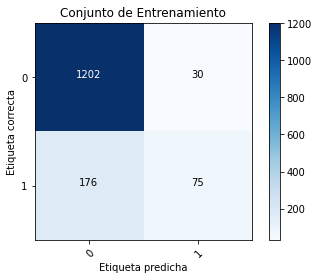

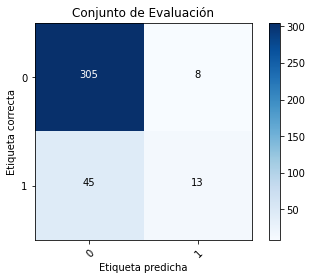

In [ ]:
plot_confusion_matrix(y_train, y_train_pred,
                      classes=dataset.TARGET.unique(), title="Conjunto de Entrenamiento")
print("     ")
plot_confusion_matrix(y_test, y_test_pred,
                      classes=dataset.TARGET.unique(), title="Conjunto de Evaluación");
#plt.tight_layout(h_pad=5, w_pad=5)

## Conclusiones Ejercicio 2.1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para el presente trabajo, es importante detectar los solicitantes que posiblemente no pagarán sus obligaciones crediticias. Tanto el indicador Recall como Precision mostraron valores muy bajos para la predicción de futuros morosos. Sin embargo, el indicador **Recall es más relevante que el indicador Precision**, ya que Recall me indica la capacidad del modelo para predecir solicitantes que no pagarán el préstamo, sobre la totalidad de los que realmente no pagarán. Precision en cambio, me indica la capacidad del modelo de predecir solicitantes que no pagarán, sobre la totalidad de los que predije que no pagarán. En este último caso, el problema está en negarles el préstamo a quienes realmente lo pagarían.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Otro indicador importante que normalmente se usa es **Accuracy**. Sin embargo, este indicador no es recomendable en casos donde el conjunto de datos tiene desbalanceados los registros entre etiquetas, como es el caso del presente dataset. Justamente aquí se da el caso que Accuracy es relativamente alto (0.8) y sin embargo el modelo es muy malo para predecir los solicitantes que no pagarán sus préstamos.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finalmente, podemos nombrar a **F1-Score** como un indicador interesante por su balance entre Precision y Recall, sin verse afectado por el desbalance en las etiquetas reales del conjunto de datos. No obstante, para el caso específico de este dataset, Recall es el indicador más efectivo para evaluar la calidad del modelo en función de los objetivos del banco.  

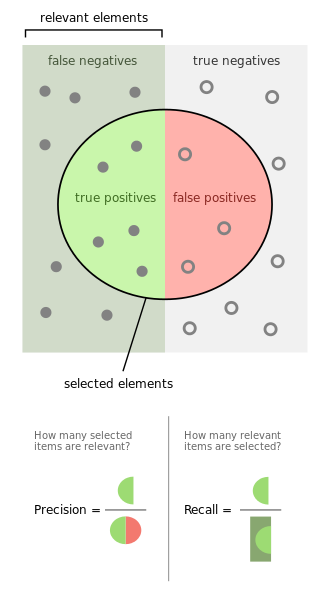 Fte:https://steemit.com/spanish/@waster/explicacion-alternativa-para-accuracy-precision-recall-y-f1-score

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Obtenemos párametros por defecto de la clase SGDClassifier

In [ ]:
SGDClassifier().get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Trabajamos con las siguientes funciones de coste:


*   hinge = regresión lineal
*   log = regresión logística
*   perceptron = algoritmo perceptron





En el siguiente código utilizamos distintos parámetros para obtener las mejores combinaciones para las tres funciones de coste detalladas en la parte superior.

*********************************************************
****Hiperparámetros para función de coste hinge *********
Mejor conjunto de parámetros:
{'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'adaptive', 'penalty': 'l2'}
Train dataset accuracy: 0.873
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1232
           1       0.92      0.27      0.42       251

    accuracy                           0.87      1483
   macro avg       0.90      0.64      0.68      1483
weighted avg       0.88      0.87      0.84      1483

*********************************************************
****Hiperparámetros para función de coste log *********
Mejor conjunto de parámetros:
{'alpha': 1e-05, 'eta0': 10.0, 'learning_rate': 'adaptive', 'penalty': 'l1'}
Train dataset accuracy: 0.873
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              pre

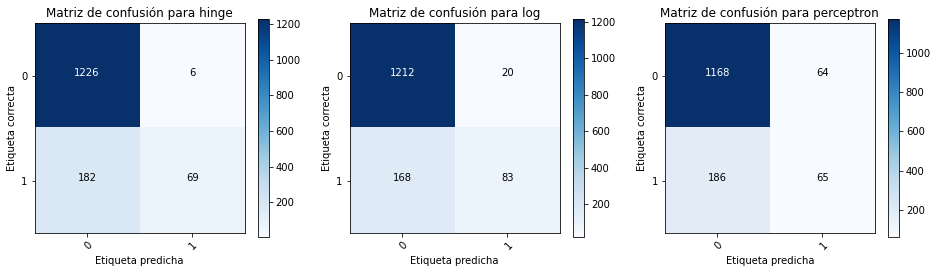

In [ ]:
fig, ax1 = plt.subplots(1,3,figsize=(16, 4))
for i, loss in enumerate(('hinge','log','perceptron')):
    param_grid1 = {
     'learning_rate': ['adaptive'],
      'penalty':['l1','l2'],
        'eta0': [1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02],  
        'alpha': [1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]
    }
    modelx = linear_model.SGDClassifier(random_state=22,loss=loss)
    cvx = GridSearchCV(modelx, param_grid1, cv=5, scoring='accuracy')
    cvx.fit(X_strain, y_train)
    
    print("*********************************************************")
    print("****Hiperparámetros para función de coste",loss,"*********")
    print("Mejor conjunto de parámetros:")
    print(cvx.best_params_)
    print("Train dataset accuracy: %0.03f" % cvx.score(X_strain,y_train))

#Predecimos valores "y" del conj de entrenamiento
    y_train_predx = cvx.predict(X_strain)

 #Predecimos valores "y" del conj de evaluación 
    y_test_predx = cvx.predict(X_stest)

    print("****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****") 
    print(classification_report(y_train, y_train_predx)) 

    
    plot_confusion_matrix(y_train, y_train_predx, classes=dataset.TARGET.unique(),
                         ax=ax1[i],title="Matriz de confusión para %s" % loss)
     

###Reportamos accuracy promedio y varianza para todas las configuraciones.

In [ ]:
results = cvx.cv_results_
df = pd.DataFrame(results)
df2 = df[['param_alpha','param_eta0','param_learning_rate', 'mean_test_score', 'std_test_score', 'param_penalty', 'rank_test_score']]

In [ ]:
df2.sort_values('rank_test_score').head(10)

,param_alpha,param_eta0,param_learning_rate,mean_test_score,std_test_score,param_penalty,rank_test_score
24,0.0001,0.1,adaptive,0.863796,0.007148,l1,1
65,0.1,0.00001,adaptive,0.851003,0.016760,l2,2
12,0.00001,10.0,adaptive,0.848289,0.035473,l1,3
83,1.0,0.0001,adaptive,0.848273,0.011580,l2,4
58,0.01,1.0,adaptive,0.847623,0.026693,l1,5
42,0.001,1.0,adaptive,0.846251,0.008281,l1,6
20,0.0001,0.001,adaptive,0.844884,0.018919,l1,7
51,0.01,0.0001,adaptive,0.843564,0.020750,l2,8
16,0.0001,0.00001,adaptive,0.842891,0.011935,l1,9
54,0.01,0.01,adaptive,0.842204,0.012067,l1,10


####Con la mejor configuración encontrada (hinge,'alpha': 0.1, 'eta0': 10.0, 'learning_rate': 'adaptive', 'penalty': 'l2'), evaluamos sobre el conjunto de entrenamiento (X_train,y_train) y sobre el conjunto de evaluación (x_test,y_test).

Train dataset accuracy: 0.852
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1232
           1       0.92      0.14      0.24       251

    accuracy                           0.85      1483
   macro avg       0.89      0.57      0.58      1483
weighted avg       0.86      0.85      0.80      1483

-----------------------------------------------------------------
Test dataset accuracy: 0.871
****Reporte de clasificación sobre conjunto de evaluación (métricas)*****
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       313
           1       1.00      0.17      0.29        58

    accuracy                           0.87       371
   macro avg       0.93      0.59      0.61       371
weighted avg       0.89      0.87      0.83       371



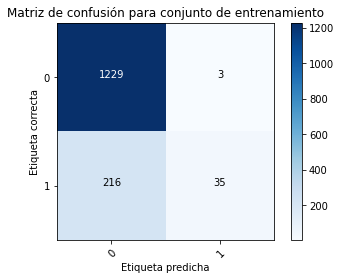

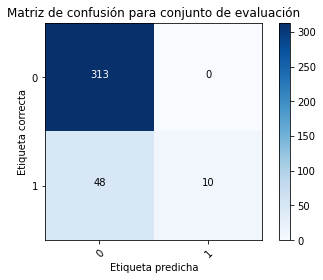

In [ ]:
#Entrenamos el modelo
modelb = linear_model.SGDClassifier(random_state=22, loss='hinge', alpha= 0.1, eta0=10.0, 
                                    learning_rate='adaptive', penalty='l2')
modelb.fit(X_strain, y_train)
print("Train dataset accuracy: %0.03f" % modelb.score(X_strain,y_train))

#Predecimos valores "y" del conj de entrenamiento
y_train_predb = modelb.predict(X_strain)

#Predecimos valores "y" del conj de evaluación
y_test_predb = modelb.predict(X_stest)

print("****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****") 
print(classification_report(y_train, y_train_predb))
print("-----------------------------------------------------------------")
print("Test dataset accuracy: %0.03f" % modelb.score(X_stest,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación (métricas)*****") 
print(classification_report(y_test, y_test_predb)) 
plot_confusion_matrix(y_train, y_train_predb, classes=dataset.TARGET.unique(),
                         title="Matriz de confusión para conjunto de entrenamiento");
 
plot_confusion_matrix(y_test, y_test_predb, classes=dataset.TARGET.unique(),
                         title="Matriz de confusión para conjunto de evaluación");

###Interpretación de las métricas para el conjunto de evaluación

*   Accuracy: Esta métrica representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos. Para nuestro modelo obtuvimos un 87% de valores correctamente clasificados. Dado que este indicador se utiliza cuando los datos están balanceados, no sería un buen indicador para nuestro conjunto de datos ya que los mismos presentan un desbalance en la cantidad de registros por etiqueta.

      Accuracy = (TP + TN) / (TP + TN + FP + FN)
      
*   Precision: Este indicador nos muestra que el modelo obtenido identifica correctamente el 87% de las veces a un cliente que pagaría el crédito otorgado, sobre el total de los que predijo que pagarían. Del mismo modo, el 100% de las veces identificó correctamente a los clientes morosos, sobre el total de los que predijo que serían morosos.

*   Recall:  Este indicador nos dice que el modelo identifica de forma correcta el 100% de las veces a clientes que pagarán el crédito, sobre los que realmente pagarán. Del mismo modo, identifica de forma correcta el 17% de las veces a clientes morosos, sobre el total de los que realmente son morosos. 

*   F1: Este indicador es una medida de la precisión del modelo y para nuestro conjunto de datos obtuvimos una precisión del 93% para predecir a los clientes que pagarán y 29% para predecir a los clientes morosos.

**Conclusión respecto del modelo lineal**: El modelo es bueno para identificar clientes que pagarán, pero es malo para identificar clientes morosos.





## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


**Entrenamos el modelo**

In [ ]:
clasift = tree.DecisionTreeClassifier(random_state=22)
clasift.fit(X_strain, y_train)

DecisionTreeClassifier(random_state=22)

**Predecimos valores "y" del conjunto de entrenamiento y del conjunto de evaluación**

In [ ]:
y_train_predt = clasift.predict(X_strain)
y_test_predt = clasift.predict(X_stest)

**Evaluamos sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando las métricas**



Train dataset accuracy: 1.000
****Reporte de clasificación sobre conjunto de entrenamiento*****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



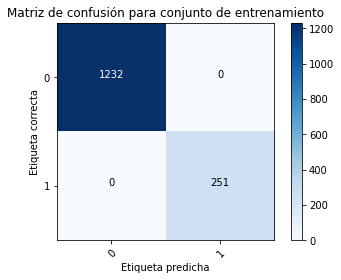

In [ ]:
print("Train dataset accuracy: %0.03f" % clasift.score(X_strain,y_train))
print("****Reporte de clasificación sobre conjunto de entrenamiento*****") 
print(classification_report(y_train, y_train_predt))
plot_confusion_matrix(y_train, y_train_predt, classes=dataset.TARGET.unique(),
                         title="Matriz de confusión para conjunto de entrenamiento");

Test dataset accuracy: 0.879
****Reporte de clasificación sobre conjunto de evaluación*****
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.61      0.62      0.62        58

    accuracy                           0.88       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.88      0.88      0.88       371



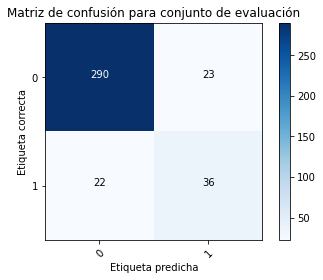

In [ ]:
print("Test dataset accuracy: %0.03f" % clasift.score(X_stest,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación*****") 
print(classification_report(y_test, y_test_predt))
plot_confusion_matrix(y_test, y_test_predt, classes=dataset.TARGET.unique(),
                         title="Matriz de confusión para conjunto de evaluación");

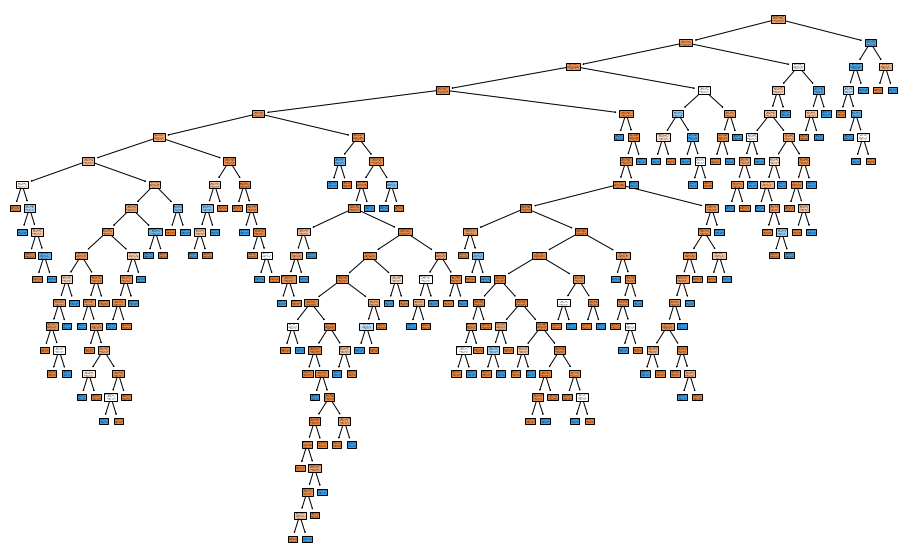

In [ ]:
plt.figure(figsize=(16,10))
tree.plot_tree(clasift, feature_names=dataset.columns[1:],  
                      class_names=["0","1"],  
                      filled=True)
plt.show()

####**Observamos sobreajuste en el conjunto de datos cuando instanciamos el modelo con parámetros por defecto. Se espera solucionar este resultado al instanciar el modelo con  mejores valores para los parámetros *max_depth* y *min_samples_leaf*.**

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Obtenemos párametros por defecto de la clase DecisionTreeClassifier 

In [ ]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

******************************************************************
*********Hiperparámetros para citerio de partición gini *********
Mejor conjunto de parámetros:
{'max_depth': 10, 'min_samples_leaf': 2}
Best accuracy: 0.951
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1232
           1       0.98      0.73      0.83       251

    accuracy                           0.95      1483
   macro avg       0.97      0.86      0.90      1483
weighted avg       0.95      0.95      0.95      1483

Ac.promedio: 0.8834 y var (+/-0.0004) para los parámetros {'max_depth': 10, 'min_samples_leaf': 1}
Ac.promedio: 0.8881 y var (+/-0.0003) para los parámetros {'max_depth': 10, 'min_samples_leaf': 2}
Ac.promedio: 0.8753 y var (+/-0.0008) para los parámetros {'max_depth': 11, 'min_samples_leaf': 1}
Ac.promedio: 0.8800 y var (+/-0.0004) para los parámetros {'max_depth': 11

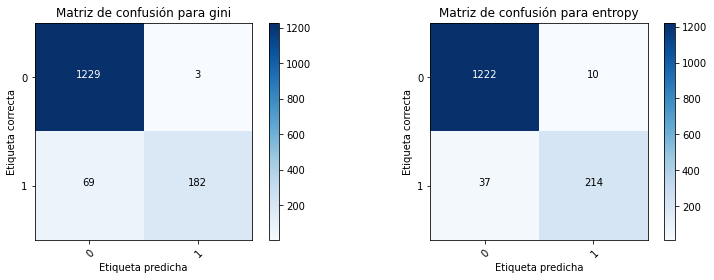

In [ ]:
fig, ax2 = plt.subplots(1,2,figsize=(13, 4))
for n, criterion in enumerate(('gini','entropy')):
    param_grid2 = {
     'max_depth': [10,11,12,13,14,15],  # Profundidad máxima del árbol
        'min_samples_leaf': [1,2],  # Cantidad mínima de samples por hoja
    }
    modelt = tree.DecisionTreeClassifier(random_state=22,criterion=criterion)
    cvt = GridSearchCV(modelt, param_grid2, scoring='accuracy',cv=5)
    cvt.fit(X_strain, y_train)

    print("******************************************************************")
    print("*********Hiperparámetros para citerio de partición",criterion,"*********")
    print("Mejor conjunto de parámetros:")
    print(cvt.best_params_)
    print("Best accuracy: %0.03f" % cvt.score(X_strain,y_train))

    y_train_predtt = cvt.predict(X_strain)
    print("****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****") 
    print(classification_report(y_train, y_train_predtt)) 
    plot_confusion_matrix(y_train, y_train_predtt, classes=dataset.TARGET.unique(),
                         ax=ax2[n],title="Matriz de confusión para %s" % criterion)
    
    meant = cvt.cv_results_['mean_test_score']
    stdt = cvt.cv_results_['std_test_score']
    for mean, std, params in zip(meant, stdt, cvt.cv_results_['params']):
        print("Ac.promedio: %0.4f y var (+/-%0.04f) para los parámetros %r" % (mean, std ** 2, params))

####Mejor conjunto de parámetros, función de coste entropy : 'max_depth': 11, 'min_samples_leaf': 2


In [ ]:
clasiftt = tree.DecisionTreeClassifier(random_state=22, criterion="entropy",
                                       max_depth=11, min_samples_leaf=2)
clasiftt.fit(X_strain, y_train)
print("Train dataset accuracy: %0.03f" % clasiftt.score(X_strain,y_train))

Train dataset accuracy: 0.968


Test dataset accuracy: 0.887
****Reporte de clasificación sobre conjunto de evaluación (métricas)*****
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       313
           1       0.65      0.60      0.62        58

    accuracy                           0.89       371
   macro avg       0.79      0.77      0.78       371
weighted avg       0.88      0.89      0.89       371



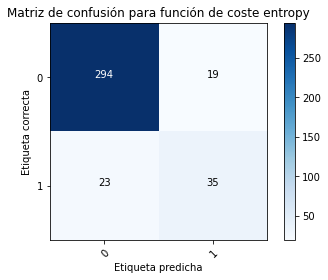

In [ ]:
y_test_predtt = clasiftt.predict(X_stest)
print("Test dataset accuracy: %0.03f" % clasiftt.score(X_stest,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación (métricas)*****") 
print(classification_report(y_test, y_test_predtt)) 
plot_confusion_matrix(y_test, y_test_predtt, classes=dataset.TARGET.unique(),
                        title="Matriz de confusión para función de coste entropy");

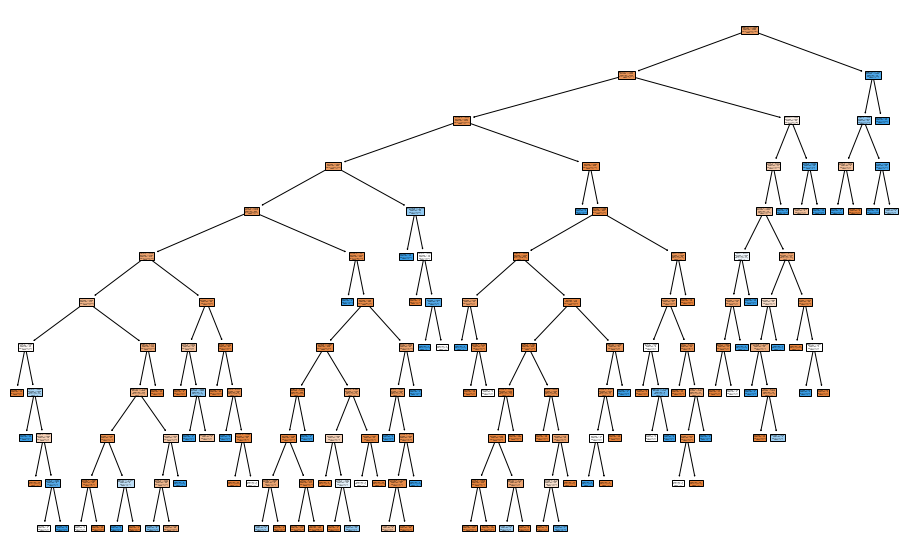

In [ ]:
plt.figure(figsize=(16,10))
tree.plot_tree(clasiftt, feature_names=dataset.columns[1:],  
                      class_names=["0","1"],  
                      filled=True)
plt.show()

###Conclusiones Ejercicio 3.2 y comentarios finales

El ajuste de hiperparámetros max_depth y min_samples_leaf en el presente ejercicio, evitó el sobreajuste del modelo observado en el ejercicio 3.1,  aumentando su capacidad de generalización. Por otra parte, el uso de Árboles de decisión como algoritmo de clasificación, logró mejoras en la performance del modelo predictor, respecto del clasificador SGD. Esto pudo observarse en la mejora del indicador F1, y particularmente para el indicador Recall que es importante para la identificación de clientes potencialmente morosos. Cabe destacar que, en el caso de datasets desbalanceados como en el presente trabajo, una buena alternativa de mejora podría ser la asignación de pesos específicos a las clases de acuerdo a la etiqueta más relevante; o simplemente asignar pesos balanceados por la proporción de etiquetas. Esto es posible mediante el parámetro class_weight, tanto en SGDclassifier como en DecisionTreeClassifier.